In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC

### Pre-processing

In [108]:
# Reading the Training Data
df = pd.read_csv("/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_train_set.csv")

In [109]:
# 1. Displaying the first 10 records
df.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
5,Male,39.0,0,0,Yes,Private,Urban,164.67,33.8,Unknown,0
6,Female,47.0,0,0,Yes,Private,Rural,195.04,45.5,never smoked,0
7,Male,1.8,0,0,No,children,Urban,153.31,17.1,Unknown,0
8,Male,41.0,0,0,Yes,Private,Urban,104.34,30.3,Unknown,0
9,Female,47.0,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0


In [110]:
df.shape
df['stroke'].value_counts()

stroke
0    3888
1     200
Name: count, dtype: int64

In [111]:
# 2. Check dataset info - field types, non-null values, dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     4088 non-null   object 
 10  stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,3926.000000,4088.000000
mean,43.143395,0.098092,0.054550,106.098173,28.937061,0.048924
std,22.559356,0.297475,0.227127,45.313054,7.942361,0.215735
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.287500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.027500,33.100000,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


In [112]:
# 3a. Pre-processing (Cleaning): Address missing (NULL) values - drop or imputation
mean_impute = df['bmi'].mean()
df['bmi'].fillna(value = mean_impute, inplace = True)
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                4088 non-null   float64
 9   smoking_status     4088 non-null   object 
 10  stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


In [113]:
# 3b. Pre-processing (Cleaning): Remove Duplicate Rows
df.drop_duplicates(inplace=True)
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,43.143395,0.098092,0.054550,106.098173,28.937061,0.048924
std,22.559356,0.297475,0.227127,45.313054,7.783361,0.215735
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.287500,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.027500,32.800000,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000


In [114]:
# 3c. Pre-processing (Cleaning): Drop irrelevant columns (that you don't want to give as input to the model)
#df = df.drop(columns=["id"])

In [115]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0


In [117]:
df['smoking_status'].replace(' ','_',regex = True, inplace=True)
df['work_type'].replace('-','_',regex = True, inplace=True)
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly_smoked,0


In [118]:
df.drop(df.index[(df["gender"] == "Other")],axis=0,inplace=True)

In [119]:
# 3d. Pre-processing (Encoding): Convert categorical values to numeric
# Use df['col_name'].value_counts() to find out all the categories available per column

df['gender'].value_counts()
df['ever_married'].value_counts()
df['work_type'].value_counts()
df['Residence_type'].value_counts()
df['smoking_status'].value_counts()

#One hot encoding
df = pd.get_dummies(df, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'],dtype=int) # Pandas function to convert 'objects' (categorical) to one-hot (new col per category)


In [120]:
df.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,47.0,0,0,63.98,26.8,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,54.0,0,0,86.26,35.1,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0


In [121]:
# 4a. Data understanding - Find out stats regarding your data (df.describe(), df.mean(), df.median())
df.describe()
df.mean()
df.median()

age                               45.00
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 91.85
bmi                               28.40
stroke                             0.00
gender_Female                      1.00
gender_Male                        0.00
ever_married_No                    0.00
ever_married_Yes                   1.00
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  1.00
work_type_Self_employed            0.00
work_type_children                 0.00
Residence_type_Rural               0.00
Residence_type_Urban               1.00
smoking_status_Unknown             0.00
smoking_status_formerly_smoked     0.00
smoking_status_never_smoked        0.00
smoking_status_smokes              0.00
dtype: float64

<Axes: >

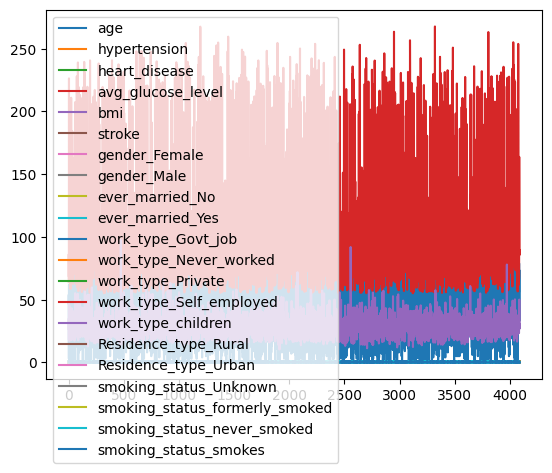

In [122]:
# 4b. Data understanding - Make use of plots to build more understanding of the data
# Hint: Can use df.plot()

df.plot()

### Handeling Class Imbalance by adding more Positive value(i.e 1) Oversampling

In [124]:
oversampled_data = df.copy()

num_samples = df.value_counts("stroke")[0] - df.value_counts("stroke")[1]
new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

new_df = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [125]:
new_df 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,74.0,0,0,72.96,31.3,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,69.0,1,0,236.79,35.7,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
2,82.0,0,0,59.32,33.2,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,16.0,0,0,102.10,27.1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
4,44.0,0,0,74.91,37.5,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,34.0,0,0,94.15,28.6,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7770,80.0,1,0,74.90,22.2,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
7771,50.0,1,0,68.80,34.9,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
7772,65.0,0,0,167.31,27.1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [126]:
#Now data is balanced
new_df.value_counts("stroke")[1]
new_df.value_counts("stroke")[0]

3887

In [127]:
stroke = new_df["stroke"]
new_df1 = new_df.loc[:, new_df.columns != "stroke"]

## Standard Scaler

In [128]:
 # Scale X
scaler = StandardScaler()
scaler.fit(new_df1)
df = pd.DataFrame(scaler.transform(new_df1), index=new_df1.index, columns=new_df1.columns)
df = df.join(stroke)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
0,0.892118,-0.455335,-0.366823,-0.837579,0.251252,-1.204821,1.204821,-0.552087,0.552087,-0.399940,...,0.856349,-0.513873,-0.283677,-0.952994,0.952994,-0.584381,-0.511872,-0.773481,2.261956,1
1,0.664896,2.196183,-0.366823,2.102445,0.889470,-1.204821,1.204821,-0.552087,0.552087,-0.399940,...,-1.167748,1.946008,-0.283677,1.049324,-1.049324,-0.584381,1.953613,-0.773481,-0.442095,0
2,1.255674,-0.455335,-0.366823,-1.082356,0.526846,0.829999,-0.829999,-0.552087,0.552087,-0.399940,...,0.856349,-0.513873,-0.283677,1.049324,-1.049324,-0.584381,-0.511872,1.292856,-0.442095,1
3,-1.743662,-0.455335,-0.366823,-0.314645,-0.357956,0.829999,-0.829999,1.811308,-1.811308,-0.399940,...,-1.167748,-0.513873,-0.283677,-0.952994,0.952994,-0.584381,-0.511872,1.292856,-0.442095,0
4,-0.471217,-0.455335,-0.366823,-0.802585,1.150559,-1.204821,1.204821,-0.552087,0.552087,-0.399940,...,0.856349,-0.513873,-0.283677,1.049324,-1.049324,-0.584381,-0.511872,1.292856,-0.442095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,-0.925662,-0.455335,-0.366823,-0.457312,-0.140382,-1.204821,1.204821,1.811308,-1.811308,-0.399940,...,0.856349,-0.513873,-0.283677,-0.952994,0.952994,-0.584381,-0.511872,1.292856,-0.442095,0
7770,1.164785,2.196183,-0.366823,-0.802764,-1.068699,0.829999,-0.829999,-0.552087,0.552087,-0.399940,...,0.856349,-0.513873,-0.283677,1.049324,-1.049324,-0.584381,-0.511872,1.292856,-0.442095,1
7771,-0.198550,2.196183,-0.366823,-0.912232,0.773430,0.829999,-0.829999,-0.552087,0.552087,-0.399940,...,-1.167748,1.946008,-0.283677,1.049324,-1.049324,-0.584381,-0.511872,1.292856,-0.442095,0
7772,0.483118,-0.455335,-0.366823,0.855586,-0.357956,0.829999,-0.829999,-0.552087,0.552087,-0.399940,...,-1.167748,1.946008,-0.283677,1.049324,-1.049324,-0.584381,-0.511872,1.292856,-0.442095,0


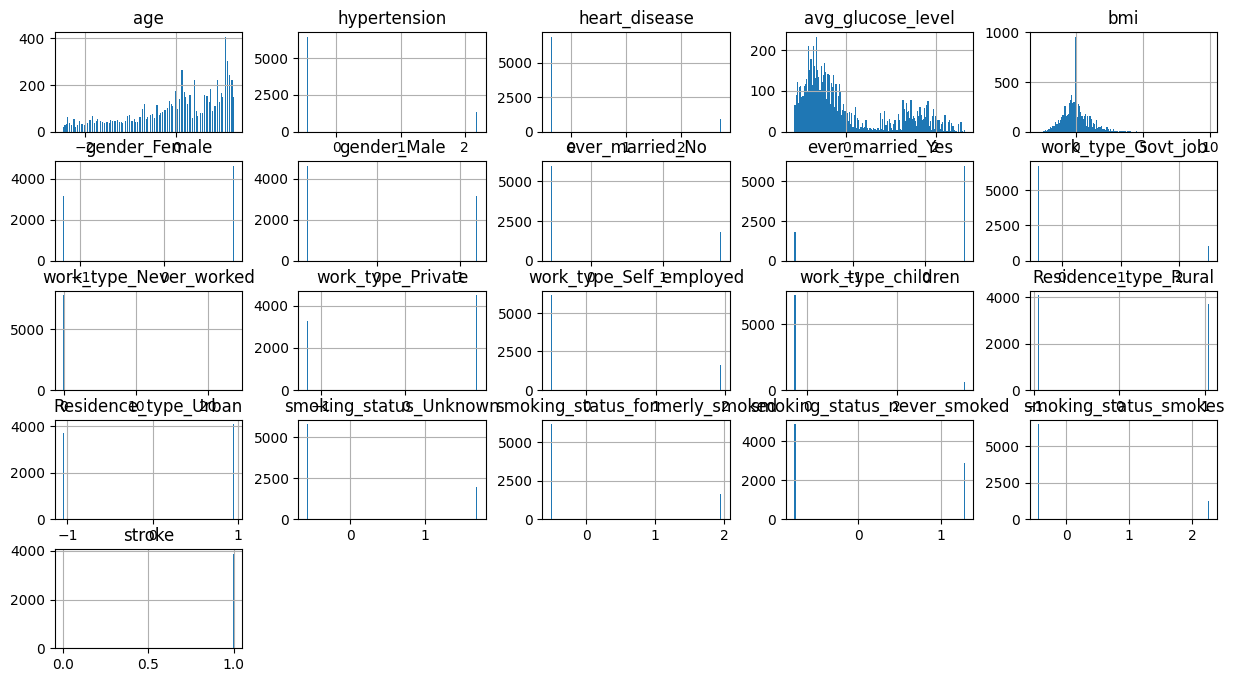

In [88]:
df.hist(bins=150, figsize=(15,8))
plt.show()

In [18]:
# 4b. (Optional) Create More plots to understand the relationship b/w different variables

# Example: Top 20 actors of movies based on the imdb rating of the movies

#plt.figure(figsize=(10, 8))

# Create a new dataframe with top 20 values
#new_df = df.sort_values(by ='imdb_score' , ascending=False)
#new_df = new_df.head(20)

# plotting
#ax=sns.pointplot(x=new_df['actor_1_name'], y=new_df['imdb_score'], hue=new_df['movie_title'])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
#plt.show()

In [408]:
##sns.pairplot(df,hue = None)

In [89]:
# 4c. Find out which input features are the most important
# Hint: Start out with df.corr(). Can visualise with seaborn library
df.corr()

#attributes = [['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke','gender_Female','gender_Male','gender_Other','ever_married_No','ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self_employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly_smoked','smoking_status_never_smoked','smoking_status_smokes']]
#scatter_matrix(df[attributes], figsize=(12,8))
#plt.show()
     

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,stroke
age,1.000000,0.270046,0.258942,0.283256,0.183241,-0.005117,0.005117,-0.576490,0.576490,0.053853,...,0.077712,0.261447,-0.609813,-0.004974,0.004974,-0.286105,0.178835,0.108520,-0.001139,0.565112
hypertension,0.270046,1.000000,0.080879,0.183115,0.147018,-0.003093,0.003093,-0.109512,0.109512,-0.027788,...,-0.074002,0.198942,-0.129168,-0.005045,0.005045,-0.180746,0.044429,0.127055,-0.002088,0.215901
heart_disease,0.258942,0.080879,1.000000,0.240656,0.052528,-0.141607,0.141607,-0.085922,0.085922,-0.009392,...,0.046769,0.018979,-0.102544,-0.052436,0.052436,-0.046315,0.054518,-0.103690,0.130453,0.220412
avg_glucose_level,0.283256,0.183115,0.240656,1.000000,0.258206,-0.078878,0.078878,-0.214648,0.214648,0.022613,...,0.036272,0.028714,-0.138999,-0.015690,0.015690,-0.113201,0.045583,0.035377,0.037054,0.268564
bmi,0.183241,0.147018,0.052528,0.258206,1.000000,-0.000066,0.000066,-0.253235,0.253235,0.034161,...,0.150653,0.023462,-0.362253,-0.039195,0.039195,-0.223308,0.086028,0.065454,0.083035,0.101195
gender_Female,-0.005117,-0.003093,-0.141607,-0.078878,-0.000066,1.000000,-1.000000,0.025823,-0.025823,0.065489,...,-0.055405,0.038907,-0.040702,0.006406,-0.006406,-0.046729,-0.086250,0.164412,-0.065513,0.011255
gender_Male,0.005117,0.003093,0.141607,0.078878,0.000066,-1.000000,1.000000,-0.025823,0.025823,-0.065489,...,0.055405,-0.038907,0.040702,-0.006406,0.006406,0.046729,0.086250,-0.164412,0.065513,-0.011255
ever_married_No,-0.576490,-0.109512,-0.085922,-0.214648,-0.253235,0.025823,-0.025823,1.000000,-1.000000,-0.065617,...,-0.121650,-0.136379,0.513826,-0.046456,0.046456,0.285930,-0.170167,-0.027498,-0.114189,-0.294892
ever_married_Yes,0.576490,0.109512,0.085922,0.214648,0.253235,-0.025823,0.025823,-1.000000,1.000000,0.065617,...,0.121650,0.136379,-0.513826,0.046456,-0.046456,-0.285930,0.170167,0.027498,0.114189,0.294892
work_type_Govt_job,0.053853,-0.027788,-0.009392,0.022613,0.034161,0.065489,-0.065489,-0.065617,0.065617,1.000000,...,-0.467030,-0.205518,-0.113454,-0.012859,0.012859,-0.021321,-0.023514,0.028311,0.013856,0.026862


<Axes: >

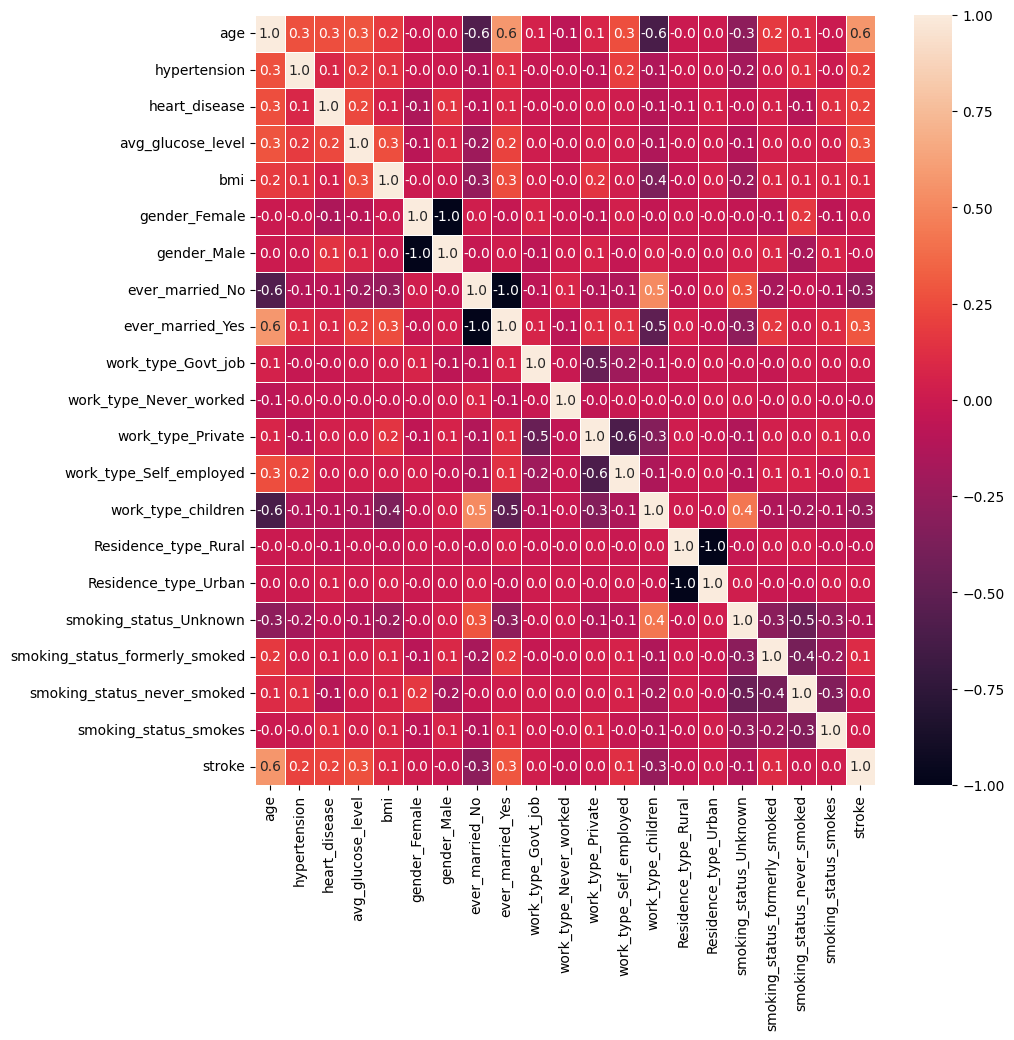

In [90]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Feature Selection

In [150]:
#df.drop(['ever_married_No','ever_married_Yes','work_type_children'],axis=1, inplace=True)
#df = df[['age','avg_glucose_level','stroke']]

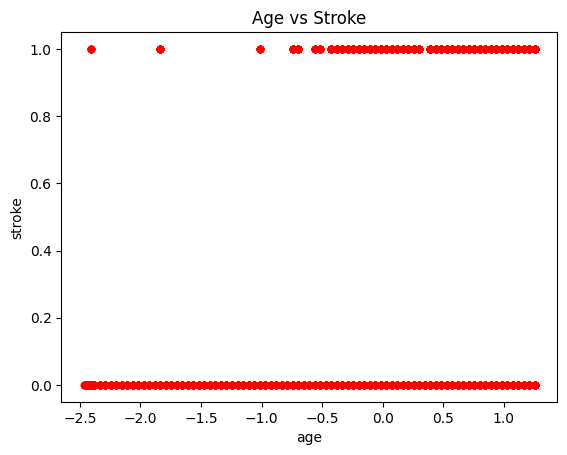

In [91]:
df.plot(kind='scatter', 
        x='age', 
        y='stroke', 
        color='red') 
  
# set the title 
plt.title('Age vs Stroke') 
  
# show the plot 
plt.show() 

In [115]:
# Any other relevant pre-processing (upto your exploration)

### Model Development

In [129]:
# 1. Divide dataframe into input and output
X = df.drop(columns=['stroke']) #-> Drop the column to be predicted
y = df['stroke'] #-> Choose Output column to be predicted

In [ ]:
##Feature selection - ChiSqure

In [34]:
# 2. Perform Feature Selection - Experiment with the best one!
feat_selector = SelectKBest(mutual_info_classif, k=10)
X = feat_selector.fit_transform(X, y)
chosen_features = feat_selector.get_feature_names_out()

In [35]:
chosen_features 

array(['age', 'avg_glucose_level', 'bmi', 'ever_married_No',
       'ever_married_Yes'], dtype=object)

In [130]:
# Usually, we do a train-test split, but, in the hackathon, we'll already provide you with the separate datasets for each
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
X_train

array([[ 0.98300704,  1.34119369, -0.3724613 , -0.55208719,  0.55208719],
       [ 0.80122907, -1.11896528, -0.82211504, -0.55208719,  0.55208719],
       [-1.69821799, -0.66386548,  0.22224202,  1.81130809, -1.81130809],
       ...,
       [-2.15266291, -0.61882208, -2.09855144,  1.81130809, -1.81130809],
       [ 0.11956169,  1.74873772, -0.09149145,  1.81130809, -1.81130809],
       [-1.6527735 , -0.71016506,  0.32377673,  1.81130809, -1.81130809]])

In [38]:
y_train

4339    1
1655    0
948     0
5475    1
6321    1
       ..
37      0
2571    1
5201    0
1289    1
3647    0
Name: stroke, Length: 6219, dtype: int64

In [89]:
# 3. Data Normalisation: Bring into the range 0 to 1, or -1 to 1

In [39]:
# 4. Choose Model(s), fit
### Experiment with different models.
### https://scikit-learn.org/stable/supervised_learning.html
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [40]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [41]:
# 5. Evaluate with relevant metric for your problem. Eg: accuracy_score(), r2_score()
model.score(X_test,y_test)

0.7427652733118971

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7484276729559748

# TEsting SVM

In [94]:
X_train

array([[ 0.71034008,  2.19618327, -0.36682319, ..., -0.51387259,
        -0.28367684, -0.58438112],
       [ 0.11956169,  2.19618327, -0.36682319, ..., -0.51387259,
        -0.28367684, -0.58438112],
       [ 0.66489559, -0.4553354 , -0.36682319, ..., -0.51387259,
        -0.28367684, -0.58438112],
       ...,
       [-1.42555104, -0.4553354 , -0.36682319, ..., -0.51387259,
        -0.28367684, -0.58438112],
       [ 0.21045067, -0.4553354 ,  2.726109  , ..., -0.51387259,
        -0.28367684, -0.58438112],
       [-1.19832858, -0.4553354 , -0.36682319, ..., -0.51387259,
        -0.28367684,  1.71121202]])

In [154]:
lrSVC = LinearSVC()
lrSVC.fit(X_train,y_train)
y_pred = lrSVC.predict(X_test)


In [155]:
y_pred

array([ 1., -1.,  1., ..., -1.,  1.,  1.])

In [156]:
accuracy_score(y_test,y_pred)

0.7697749196141479

In [157]:
f1_score(y_test, y_pred)

0.7806372549019608

# Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gr_boost = GradientBoostingClassifier()
gr_boost.fit(X_train,y_train)
y_pred = gr_boost.predict(X_test)


In [96]:
accuracy_score(y_test,y_pred)

0.872668810289389

In [97]:
f1_score(y_test, y_pred)

0.8808664259927798

## Nural Network Classifier

In [131]:
from sklearn.neural_network import MLPClassifier

In [133]:
n_classi = MLPClassifier()
n_classi.fit(X_train,y_train)
y_pred = n_classi.predict(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [134]:
accuracy_score(y_test,y_pred)

0.9209003215434084

In [135]:
f1_score(y_test, y_pred)

0.9269162210338682

# L2 Regularization

In [35]:
regularized_lr=LogisticRegression(penalty='l2',solver='newton-cg',max_iter=200)
regularized_lr.fit(X_train,y_train)
reg_pred=regularized_lr.predict(X_test)

In [36]:
regularized_lr.score(X_test,y_test)

0.9486552567237164

In [37]:
reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

GridSearchCV

In [38]:
parameter = {'penalty':['l1','l2'],'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50],'max_iter':[100]}

In [39]:
model = LogisticRegression()
Classifier_regressor =GridSearchCV(model,param_grid=parameter, scoring = 'accuracy',cv=5)

In [ ]:
Classifier_regressor.fit(X_train,y_train)

In [41]:
Classifier_regressor.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': None,
 'param_grid': {'penalty': ['l1', 'l2'],
  'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 50],
  'max_iter': [100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [42]:
print(Classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [43]:
# 6. After model choice is made, fine-tune with GridSearchCV, or RandomizedSearchCV()

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Fitting Kernel SVM to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [46]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [47]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [48]:
accuracy=accuracy_score(y_test,y_pred)

In [49]:
accuracy

0.9486552567237164

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

accuracy = grid_search.best_score_

accuracy

grid_search.best_params_
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

-- Predicting the Test set results
y_pred = classifier.predict(X_test)

### Testing and Creating Output CSV

In [141]:
test_pd = pd.read_csv('/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_test_set_nogt.csv')
test_pd

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
1,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes
2,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never smoked
3,Female,72.0,1,0,Yes,Private,Rural,74.63,23.1,formerly smoked
4,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked
...,...,...,...,...,...,...,...,...,...,...
1017,Female,29.0,0,0,Yes,Self-employed,Urban,90.52,28.0,never smoked
1018,Female,51.0,0,0,Yes,Private,Urban,152.56,21.8,Unknown
1019,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes
1020,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked


In [142]:
test_pd['smoking_status'].replace(' ','_',regex = True, inplace=True)
test_pd['work_type'].replace('-','_',regex = True, inplace=True)
test_pd.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked
1,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes
2,Female,60.0,0,0,No,Private,Urban,89.22,37.8,never_smoked
3,Female,72.0,1,0,Yes,Private,Rural,74.63,23.1,formerly_smoked
4,Male,81.0,0,0,Yes,Self_employed,Urban,99.33,33.7,never_smoked
5,Male,78.0,0,0,Yes,Private,Urban,237.75,NaN,formerly_smoked
6,Male,78.0,1,0,No,Private,Urban,113.01,24.0,never_smoked
7,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown
8,Female,66.0,1,0,Yes,Govt_job,Rural,116.55,31.1,formerly_smoked
9,Male,80.0,1,0,Yes,Private,Urban,240.09,27.0,never_smoked


In [143]:
test_pd = pd.get_dummies(test_pd, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'],dtype=int) # Pandas function to convert 'objects' (categorical) to one-hot (new col per category)


In [144]:
test_pd.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,80.0,0,1,105.92,32.5,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,75.0,1,0,221.29,25.8,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1


df['smoking_status'].replace(' ','_',regex = True, inplace=True)
df['work_type'].replace('-','_',regex = True, inplace=True)
df.head(2)

In [145]:
# Creating output file for submission - Template Code

#test_pd = pd.read_csv('/kaggle/input/stroke-prediction-by-123-of-ai-dec-2023/stroke_test_set_nogt.csv')

# saving in a new variable to modify
test = test_pd.copy(deep=True)

# Prepare data to be given as an input to your trained model
# 1. Repeat the pre-processing done above. Eg: Conversion to categorical, filling in mean values
test['bmi'].fillna(test['bmi'].mean(), inplace=True)
test = pd.get_dummies(test)

# 2. Use the same features obtained in feature selection
#chosen_features = feat_selector.get_feature_names_out()  # from above -> getting names of chosen features
#test = test.loc[:,:]
#test.drop(['ever_married_No','ever_married_Yes','work_type_children'],axis=1, inplace=True)
#test = test[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]


# 3. Normalise/Scale the features as done above
scaler = StandardScaler()
scaler.fit(test)
test = pd.DataFrame(scaler.transform(test), index=test.index, columns=test.columns)

# 4. Predict and obtain results from the model
y_pred = n_classi.predict(test)


# 5. Save results to CSV
submission = pd.DataFrame({'ID': test_pd.index, 'stroke' : y_pred})
submission.to_csv('output_submission_eval.csv', index=False)

In [43]:
test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,1.596764,-0.323828,4.275865,-0.009425,0.514927,-1.187593,1.187593,-0.707626,0.707626,-0.380075,-0.088823,0.850553,-0.41960,-0.396759,0.978700,-0.978700,-0.652214,-0.473236,1.313519,-0.422821
1,1.377672,3.088055,-0.233871,2.544993,-0.397342,-1.187593,1.187593,-0.707626,0.707626,-0.380075,-0.088823,0.850553,-0.41960,-0.396759,-1.021763,1.021763,-0.652214,-0.473236,-0.761313,2.365068
2,0.720396,-0.323828,-0.233871,-0.379182,1.236573,0.842039,-0.842039,1.413176,-1.413176,-0.380075,-0.088823,0.850553,-0.41960,-0.396759,-1.021763,1.021763,-0.652214,-0.473236,1.313519,-0.422821
3,1.246217,3.088055,-0.233871,-0.702220,-0.764973,0.842039,-0.842039,-0.707626,0.707626,-0.380075,-0.088823,0.850553,-0.41960,-0.396759,0.978700,-0.978700,-0.652214,2.113112,-0.761313,-0.422821
4,1.640582,-0.323828,-0.233871,-0.155335,0.678319,-1.187593,1.187593,-0.707626,0.707626,-0.380075,-0.088823,-1.175706,2.38322,-0.396759,-1.021763,1.021763,-0.652214,-0.473236,1.313519,-0.422821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.637973,-0.323828,-0.233871,-0.350398,-0.097791,0.842039,-0.842039,-0.707626,0.707626,-0.380075,-0.088823,-1.175706,2.38322,-0.396759,-1.021763,1.021763,-0.652214,-0.473236,1.313519,-0.422821
1018,0.326031,-0.323828,-0.233871,1.023235,-0.941981,0.842039,-0.842039,-0.707626,0.707626,-0.380075,-0.088823,0.850553,-0.41960,-0.396759,-1.021763,1.021763,1.533238,-0.473236,-0.761313,-0.422821
1019,-0.769428,-0.323828,-0.233871,-0.121681,-1.050909,-1.187593,1.187593,1.413176,-1.413176,2.631061,-0.088823,-1.175706,-0.41960,-0.396759,0.978700,-0.978700,-0.652214,-0.473236,-0.761313,2.365068
1020,0.588941,-0.323828,-0.233871,-0.658160,-0.070559,-1.187593,1.187593,-0.707626,0.707626,2.631061,-0.088823,-1.175706,-0.41960,-0.396759,0.978700,-0.978700,-0.652214,-0.473236,1.313519,-0.422821


In [117]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.119341,-0.455335,-0.366823,-0.726316,0.758926,0.829999,-0.829999,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,1.953613,-0.442095
1,0.392229,-0.455335,-0.366823,1.538236,1.832292,0.829999,-0.829999,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,1.953613,-0.442095
2,-0.971106,-0.455335,-0.366823,-0.098221,1.991847,0.829999,-0.829999,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,-0.442095
3,-1.107440,-0.455335,-0.366823,-1.073384,-0.604541,0.829999,-0.829999,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,-0.442095
4,0.165006,-0.455335,-0.366823,-0.669967,-0.091491,-1.204821,1.204821,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,2.261956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214,1.210229,-0.455335,-0.366823,-0.659917,-0.662560,0.829999,-0.829999,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,-0.442095
6215,1.119341,-0.455335,-0.366823,-0.841706,-0.169392,-1.204821,1.204821,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,-0.442095
6216,-0.471217,-0.455335,-0.366823,-1.064411,-0.662560,-1.204821,1.204821,-0.552087,0.552087,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,-0.442095
6217,-1.016551,-0.455335,-0.366823,-0.928024,-0.981670,0.829999,-0.829999,1.811308,-1.811308,-0.042475,-0.513873,-0.283677,-0.584381,-0.511872,2.261956
